In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def create_numbers(mu=54, sigma=15, num_samples=100,seed=42):
    np.random.seed(seed)
    sample_numbers = np.random.normal(loc=mu,scale=sigma,size=num_samples) ## creates a normal distribution
    sample_numbers=np.round(sample_numbers,decimals=0)

    return sample_numbers

In [6]:
sample = create_numbers()
sample

array([61., 52., 64., 77., 50., 50., 78., 66., 47., 62., 47., 47., 58.,
       25., 28., 46., 39., 59., 40., 33., 76., 51., 55., 33., 46., 56.,
       37., 60., 45., 50., 45., 82., 54., 38., 66., 36., 57., 25., 34.,
       57., 65., 57., 52., 49., 32., 43., 47., 70., 59., 28., 59., 48.,
       44., 63., 69., 68., 41., 49., 59., 69., 47., 51., 37., 36., 66.,
       74., 53., 69., 59., 44., 59., 77., 53., 77., 15., 66., 55., 50.,
       55., 24., 51., 59., 76., 46., 42., 46., 68., 59., 46., 62., 55.,
       69., 43., 49., 48., 32., 58., 58., 54., 50.])

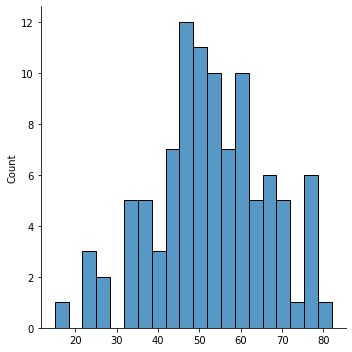

In [9]:
sns.displot(data=sample, bins=20)

C:\Users\91706\anaconda3\envs\linearRegressionsample\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

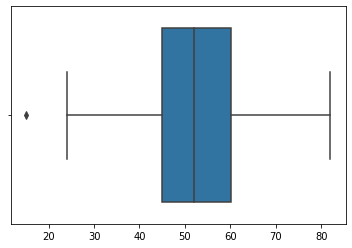

In [10]:
sns.boxplot(sample)

In [11]:
ser =  pd.Series(sample)
ser

0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 100, dtype: float64

In [12]:
ser.describe()

count    100.000000
mean      52.410000
std       13.610079
min       15.000000
25%       45.000000
50%       52.000000
75%       60.250000
max       82.000000
dtype: float64

In [13]:
IQR =  60.25 - 45.00
IQR

15.25

In [14]:
lower_limit = 45.0 - 1.5*(IQR)
print(lower_limit)
upper_limit = 60.25 + 1.5*(IQR)
print(upper_limit)

22.125
83.125


In [15]:
## to remove outlier
## give value greater than 
ser[ser > lower_limit]

0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 99, dtype: float64

In [20]:
with open(r'D:\Linear Regression\Modular\Linear-Regression\data\Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [19]:
import os

os.getcwd()

'd:\\Linear Regression\\Modular\\Linear-Regression\\outliers'

In [21]:
os.chdir("D:\Linear Regression\Modular\Linear-Regression")

In [22]:
os.getcwd()

'D:\\Linear Regression\\Modular\\Linear-Regression'

In [24]:
df = pd.read_csv(r"D:\Linear Regression\Modular\Linear-Regression\data\Ames_Housing_Data.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [25]:
df.corr()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.098375,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


In [27]:
df.corr()['SalePrice'].sort_values

<bound method Series.sort_values of PID               -0.246521
MS SubClass       -0.085092
Lot Frontage       0.357318
Lot Area           0.266549
Overall Qual       0.799262
Overall Cond      -0.101697
Year Built         0.558426
Year Remod/Add     0.532974
Mas Vnr Area       0.508285
BsmtFin SF 1       0.432914
BsmtFin SF 2       0.005891
Bsmt Unf SF        0.182855
Total Bsmt SF      0.632280
1st Flr SF         0.621676
2nd Flr SF         0.269373
Low Qual Fin SF   -0.037660
Gr Liv Area        0.706780
Bsmt Full Bath     0.276050
Bsmt Half Bath    -0.035835
Full Bath          0.545604
Half Bath          0.285056
Bedroom AbvGr      0.143913
Kitchen AbvGr     -0.119814
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Garage Yr Blt      0.526965
Garage Cars        0.647877
Garage Area        0.640401
Wood Deck SF       0.327143
Open Porch SF      0.312951
Enclosed Porch    -0.128787
3Ssn Porch         0.032225
Screen Porch       0.112151
Pool Area          0.068403
Misc Val    

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

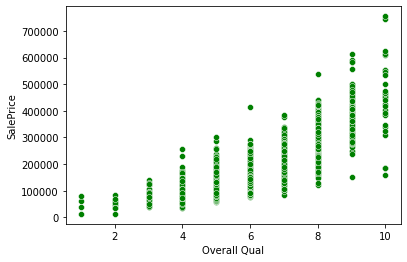

In [28]:
sns.scatterplot(x = 'Overall Qual', y='SalePrice', data=df, color='green')

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

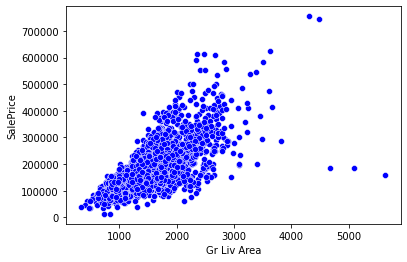

In [29]:
sns.scatterplot(x = 'Gr Liv Area', y='SalePrice', data=df, color='blue')

In [30]:
df[(df['Overall Qual']>8) & (df['SalePrice']< 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [31]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']< 400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [32]:
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']< 400000)].index

In [33]:
df = df.drop(drop_ind, axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

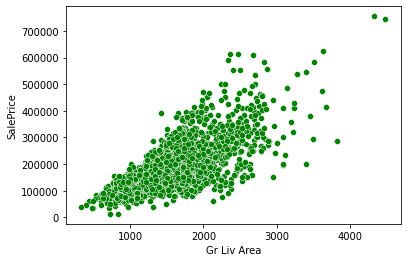

In [34]:
sns.scatterplot(x = 'Gr Liv Area', y='SalePrice', data=df, color='green')